# Project 6

I am going to analyze a dataset about the westbound traffic on the I-94 Interstate highway.

John Hogue made the dataset available, and it can be downloaded from the UCI Machine Learning Repository.

The goal of my analysis is to determine a few indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc. For instance, we may find out that the traffic is usually heavier in the summer or when it snows.

In [1]:
import pandas as pd
data = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

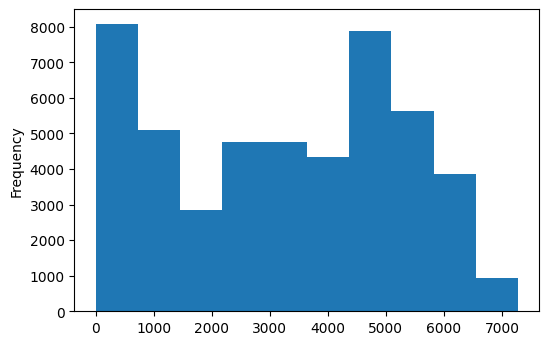

In [82]:
data["traffic_volume"].plot.hist()

In [4]:
data["traffic_volume"].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [5]:
data["date_time"] = pd.to_datetime(data["date_time"])

In [86]:
data["date_time"].dt.hour

0         9
1        10
2        11
3        12
4        13
         ..
48199    19
48200    20
48201    21
48202    22
48203    23
Name: date_time, Length: 48204, dtype: int64

In [135]:
c1 = data["date_time"].dt.hour
day_hours = data['date_time'][(c1 >= 7) & (c1 < 19)]
night_hours = data['date_time'][(c1 <  7) | (c1 > 19)]
day = data.loc[(c1 >= 7) & (c1 < 19), :]
night = data.loc[(c1 <  7) | (c1 > 19), :] 

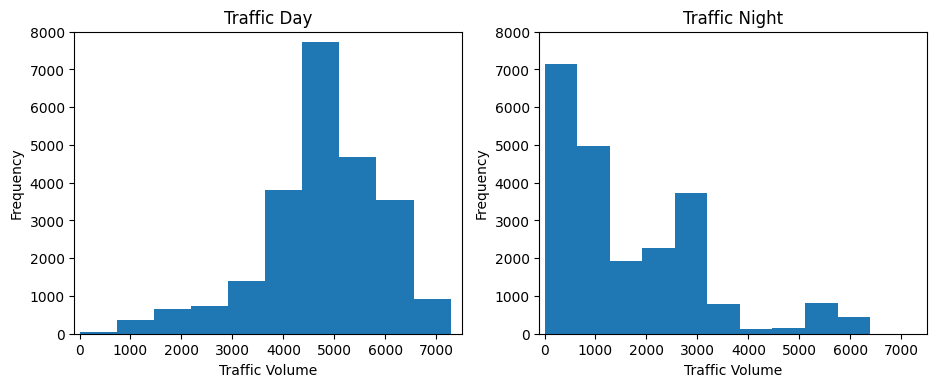

In [136]:
plt.figure(figsize=(11,4))

plt.subplot(1, 2, 1)
day["traffic_volume"].plot.hist()
plt.title("Traffic Day")
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')
plt.xlim([-100, 7500])
plt.ylim([0, 8000])

plt.subplot(1, 2, 2)
night["traffic_volume"].plot.hist()
plt.title("Traffic Night")
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')
plt.xlim([-100, 7500])
plt.ylim([0, 8000])

plt.show()

In [138]:
#day["traffic_volume"].describe()

The histogram that shows the distribution of traffic volume during the day is left skewed. This means that most of the traffic volume values are high — there are 4,252 or more cars passing the station each hour 75% of the time (because 25% of values are less than 4,252).

The histogram displaying the nighttime data is right skewed. This means that most of the traffic volume values are low — 75% of the time, the number of cars that passed the station each hour was less than 2,819.

Although there are still measurements of over 5,000 cars per hour, the traffic at night is generally light. Our goal is to find indicators of heavy traffic, so we'll only focus on the daytime data moving forward.

In [139]:
day['month'] = day['date_time'].dt.month
by_month = day.groupby('month').mean()
by_month['traffic_volume']

<ipython-input-139-b104fbd4ed31>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

Text(0.5, 1.0, 'Monthly average traffic volume')

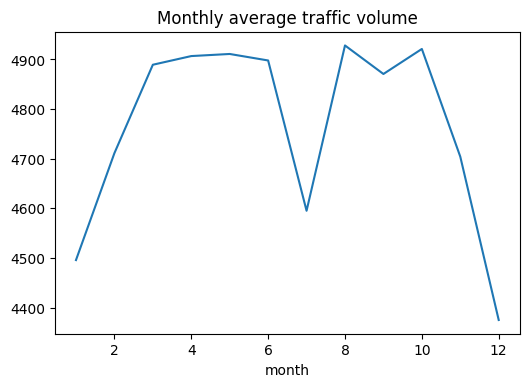

In [143]:
by_month["traffic_volume"].plot.line()
plt.title('Monthly average traffic volume')

The traffic looks less heavy during cold months (November–February) and more intense during warm months (March–October), with one interesting exception: July. 


<ipython-input-148-4491a4ad814c>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



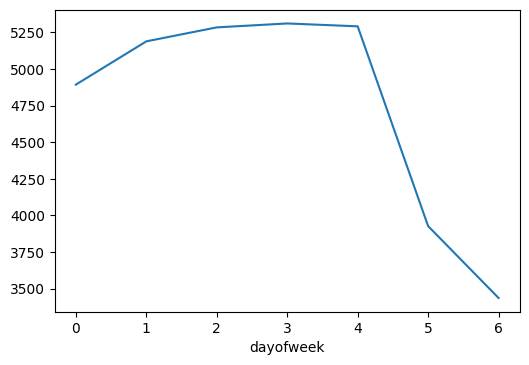

In [148]:
day['dayofweek'] = day['date_time'].dt.dayofweek
by_dayofweek = day.groupby('dayofweek').mean()
by_dayofweek['traffic_volume'].plot.line()
plt.show()

Traffic volume is significantly heavier on business days (Monday – Friday). Except for Monday, we only see values over 5,000 during business days. Traffic is lighter on weekends, with values below 4,000 cars.

In [149]:
day['hour'] = day['date_time'].dt.hour
bussiness_days = day.copy()[day['dayofweek'] <= 4] # 4 == Friday
weekend = day.copy()[day['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


<ipython-input-149-4244afafd4b2>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



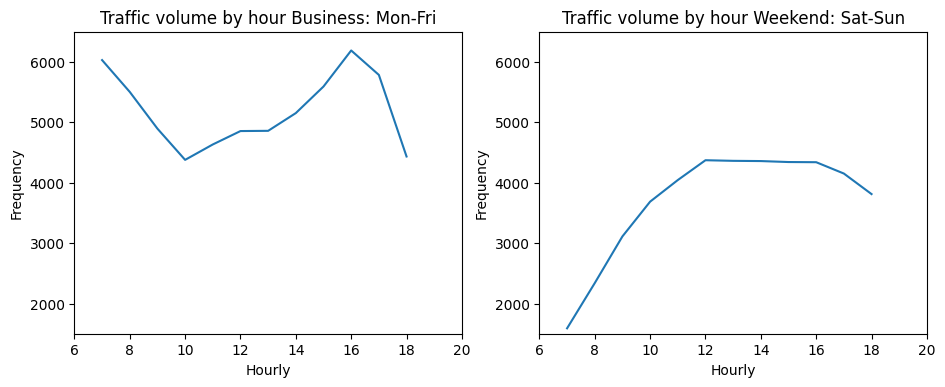

In [156]:
plt.figure(figsize=(11,4))

plt.subplot(1, 2, 1)
by_hour_business['traffic_volume'].plot.line()
plt.title("Traffic volume by hour Business: Mon-Fri")
plt.ylabel('Frequency')
plt.xlabel('Hourly')
plt.xlim(6,20)
plt.ylim(1500,6500)

plt.subplot(1, 2, 2)
by_hour_weekend['traffic_volume'].plot.line()
plt.title("Traffic volume by hour Weekend: Sat-Sun")
plt.ylabel('Frequency')
plt.xlabel('Hourly')
plt.xlim(6,20)
plt.ylim(1500,6500)

plt.show()

At each hour of the day, the traffic volume is generally higher during business days compared to the weekends. As somehow expected, the rush hours are around 7 and 16 — when most people travel from home to work and back. We see volumes of over 6,000 cars at rush hours.

To summarize, we found a few time-related indicators of heavy traffic:

1. The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
2. The traffic is usually heavier on business days compared to weekends.
3. On business days, the rush hours are around 7 and 16.

In [161]:
day.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

Temperature shows the strongest correlation with a value of just +0.13. The other relevant columns (rain_1h, snow_1h, clouds_all) don't show any strong correlation with traffic_value.

In [163]:
by_weather_main = day.groupby('weather_main').mean()
by_weather_description = day.groupby('weather_description').mean()

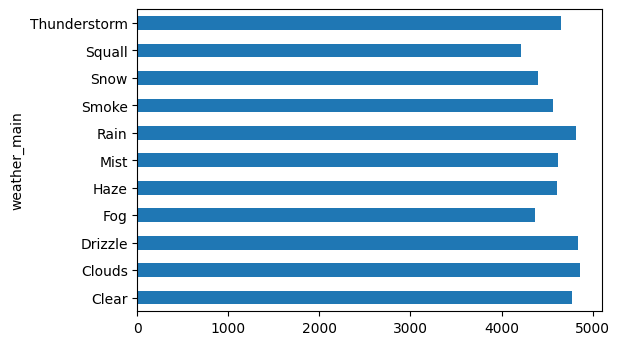

In [169]:
by_weather_main["traffic_volume"].plot.barh()

It looks like there's no weather type where traffic volume exceeds 5,000 cars. This makes finding a heavy traffic indicator more difficult. Let's also group by weather_description, which has a more granular weather classification.

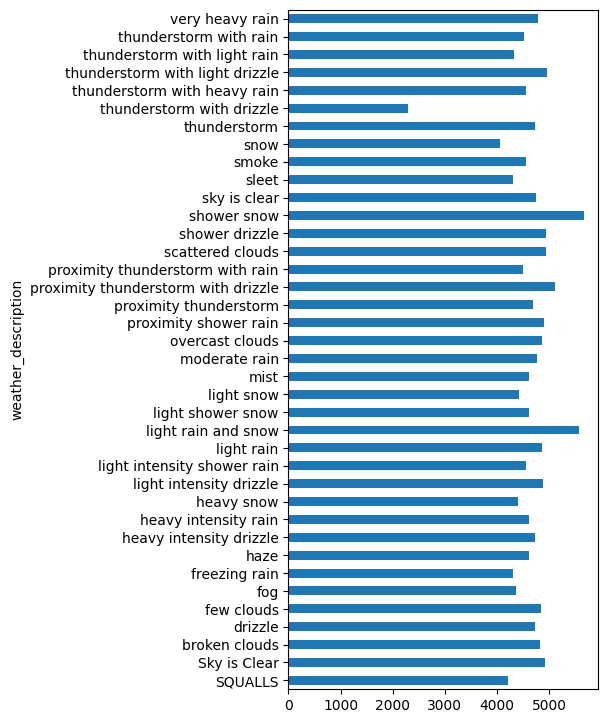

In [181]:
by_weather_description["traffic_volume"].plot.barh(figsize = (4, 9))

It looks like there are three weather types where traffic volume exceeds 5,000:

1. Shower snow
2. Light rain and snow
3. Proximity thunderstorm with drizzle

It's not clear why these weather types have the highest average traffic values — this is bad weather, but not that bad. Perhaps more people take their cars out of the garage when the weather is bad instead of riding a bike or walking.

# Conclusion
In this project, we tried to find a few indicators of heavy traffic on the I-94 Interstate highway. We managed to find two types of indicators:

Time indicators
1. The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
2. The traffic is usually heavier on business days compared to the weekends.
3. On business days, the rush hours are around 7 and 16.
Weather indicators
1. Shower snow
2. Light rain and snow
3. Proximity thunderstorm with drizzle